(content:rv:beta)=
# Beta distribution

In the following, let $X$ be a random variable that follows a *beta* distribution with shape parameters $\alpha$ and $\beta$.
The support of $X$ is $(a,b)$.
An outcome of $X$ is denoted as $x$.

In [1]:
import fesslix as flx
flx.load_engine()

import numpy as np
import fesslix.plot as flx_plot
import matplotlib.pyplot as plt
%matplotlib inline

Random Number Generator: MT19937 - initialized with rand()=1617260252;
Random Number Generator: MT19937 - initialized with 1000 initial calls.


## Syntax

```{eval-rst}
.. py:property:: beta

   Beta distribution

   ``beta`` is a distribution type (:type:`flx_rv_type`) for :ref:`content:rv:basics` in Fesslix.

   Parametrization:
       Parameters of the distribution can be specified as additional key-value pairs in an object of type :type:`flx_rv_config`. 
       The following combinations of parameters are accepted:

         - ``mu``, ``sd``
         - ``mu``, ``sd``, ``a``, ``b``
         - ``alpha``, ``beta``
         - ``alpha``, ``beta``, ``a``, ``b``
         
       The interpretation of the parameters is:

         - ``mu`` (:type:`flxPara`): mean value
         - ``sd`` (:type:`flxParaPosNo0`): standard deviation      
         - ``a`` (:type:`flxPara`): lower bound
         - ``b`` (:type:`flxPara`): upper bound; value must be larger than `a`   
         - ``alpha`` (:type:`flxParaPosNo0`): shape parameter; only positive values are allowed 
         - ``beta`` (:type:`flxParaPosNo0`): shape parameter; only positive values are allowed  
       
```
**Example:**

In [11]:
rv_1 = flx.rv({'name':'rv_1', 'type':'beta', 'mu':1e-3, 'sd':1e-2 })
rv_2 = flx.rv({'name':'rv_2', 'type':'beta', 'alpha':1., 'beta':1. })
rv_3 = flx.rv({'name':'rv_3', 'type':'beta', 'alpha':1., 'beta':2. })
rv_4 = flx.rv({'name':'rv_4', 'type':'beta', 'alpha':1., 'beta':10. })
rv_5 = flx.rv({'name':'rv_5', 'type':'beta', 'alpha':1., 'beta':1., 'a':0.25, 'b':0.75 })
rv_6 = flx.rv({'name':'rv_6', 'type':'beta', 'mu':2., 'sd':1.5, 'a':0., 'b':4. })
rv_lst = [ rv_1, rv_2, rv_3, rv_4, rv_5, rv_6 ]

## Properties

Parameters
: $\alpha\in(0,\infty)$, $\beta\in(0,\infty)$

Support
: $x\in[a,b]$

Mean
: $\mu_X = \frac{\alpha}{\alpha+\beta}\cdot(b-a)+a$

Standard deviation
: $\sigma_X = \sqrt{\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}} \cdot (b-a)$

Mode
: $\frac{\alpha-1}{\alpha+\beta-2}$ for $\alpha$ and $\beta$ larger than *one*

For $\alpha=\beta=1$, the beta distribution is equivalent to the :ref:`content:rv:uniform`.

## PDF

The PDF $f_X(x)$ of the *beta* distribution is:

$$f_X(x) = \frac{w^{\alpha-1}(1-w)^{\beta-1}}{\textrm{B}(\alpha,\beta)\cdot(b-a)}\;, \quad a \le x \le b$$

where $w$ is defined as $w = \frac{x-a}{b-a}$.

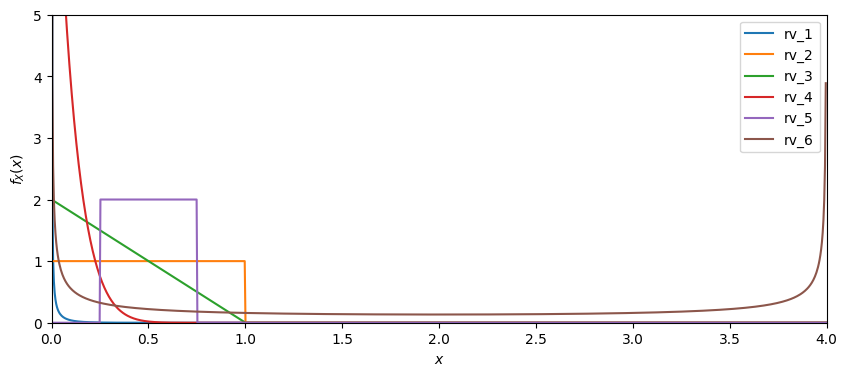

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))

for rv in rv_lst:
    flx_plot.draw_pdf(ax, rv, config_dict={'label':rv.get_name(), 'x_low':1e-6, 'x_up':4.}) 

ax.set_ylim([0., 5.])
ax.set_xlim([0., 4.])
plt.xlabel(r"$x$")
plt.ylabel(r"$f_X(x)$")
plt.legend()
plt.show()

## CDF

The CDF $F_X(x)$ of the *beta* distribution is defined as:

$$F_X(x) = I_{w}\left(\alpha,\beta\right)$$

where $I_w(\alpha,\beta)$ denotes the regularized incomplete beta function, and $w = \frac{x-a}{b-a}$.

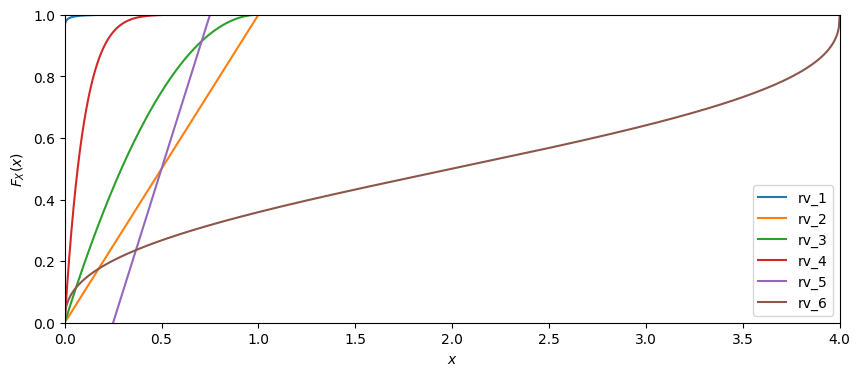

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))

for rv in rv_lst:
    flx_plot.draw_cdf(ax, rv, config_dict={'label':rv.get_name()}) 
    
ax.set_xlim([0., 4.])
ax.set_ylim([0., 1.])
plt.xlabel(r"$x$")
plt.ylabel(r"$F_X(x)$")
plt.legend()
plt.show()

## Quantile function

The *quantile function* of the *Normal* distribution is: 

$$F_X^{-1}(p) = \mu_X + \sigma_X \cdot\Phi^{-1}(p) \;, \quad p\in(0,1)$$

where $\Phi^{-1}(\cdot)$ is the quantile function of the standard Normal distribution.

## Standardizing Normal random variables

The *Normal* random variable $X$ can be transformed to a {ref}`content:rv:stdn` $U$ through:

$$U = \frac{X-\mu_X}{\sigma_X}$$

Conversely, a Normal random variable $X$ with mean $\mu_X$ and standard deviation $\sigma_X$ can be generated from a standard Normal variable as:

$$X = \mu_X + \sigma_X \cdot U$$

## Examples and Tests

In [5]:
import fesslix.tools as flx_tools

print(rv_1.mean(), rv_1.mode(), rv_1.median())

for y in flx_tools.discretize_x(x_low=-9., x_up=9., x_disc_N=2*(2*9+1)):
    x = rv_1.y2x(y)
    print(f"{y:6.1f}, {x:10.5e}")

0.001 0.0 2.1807425260006769e-35
  -9.0, 0.00000e+00
  -8.5, 0.00000e+00
  -8.0, 0.00000e+00
  -7.5, 0.00000e+00
  -7.1, 0.00000e+00
  -6.6, 0.00000e+00
  -6.1, 0.00000e+00
  -5.6, 0.00000e+00
  -5.1, 0.00000e+00
  -4.6, 0.00000e+00
  -4.1, 0.00000e+00
  -3.6, 0.00000e+00
  -3.2, 0.00000e+00
  -2.7, 5.00713e-272
  -2.2, 4.02131e-207
  -1.7, 1.86053e-152
  -1.2, 1.10311e-107
  -0.7, 2.54389e-72
  -0.2, 1.06805e-45
   0.2, 6.77000e-27
   0.7, 1.05398e-14
   1.2, 1.22453e-07
   1.7, 4.32064e-04
   2.2, 1.50913e-02
   2.7, 7.35835e-02
   3.2, 1.71833e-01
   3.6, 2.90750e-01
   4.1, 4.14646e-01
   4.6, 5.32803e-01
   5.1, 6.38612e-01
   5.6, 7.28705e-01
   6.1, 8.02154e-01
   6.6, 8.59740e-01
   7.1, 9.03285e-01
   7.5, 9.35100e-01
   8.0, 9.58166e-01
   8.5, 1.00000e+00
   9.0, 1.00000e+00
